In [48]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import os
import shutil
import kagglehub
nancyalaswad90_diamonds_prices_path = kagglehub.dataset_download('nancyalaswad90/diamonds-prices')

print('Data source import complete.')


Data source import complete.


<p style="background-color:#f2e9ee;color:#000;font-family:newtimeroman;font-size:250%;text-align:center;border-radius:10px 10px; padding:10px;">Diamond Prices Prediction</p>
<p style="background-color:#e6d8c8;color:#000;font-family:newtimeroman;font-size:180%;text-align:center;border-radius:10px 10px; padding:10px;">A Beginner Friendly Guide to Regression</p>

<div style="text-align:center">
    <img src="https://cdn.pixabay.com/photo/2016/11/25/07/00/diamond-1857733_960_720.png" width="420px">
 </div>

---
<a id='section-0'></a>
<p style="background-color:#f2e9ee;color:#000;font-family:newtimeroman;font-size:120%;text-align:center;border-radius:10px 10px; padding:10px;">Table Of Contents</p>
<ol>
    <li><a href="#section-1" style="color:#b17c6c; font-size:120%;">Introduction</a></li>
    <li><a href="#section-2" style="color:#b17c6c;font-size:120%;">Importing Necessary Libraries</a></li>
    <li><a href="#section-3" style="color:#b17c6c;font-size:120%;">Data Loading and Pre-Processing</a></li>
    <li><a href="#section-4" style="color:#b17c6c;font-size:120%;">Exploratory Data Analysis</a></li>
    <li><a href="#section-5" style="color:#b17c6c;font-size:120%;">Encoding and Normalization</a></li>
    <li><a href="#section-6" style="color:#b17c6c;font-size:120%;">Modelling</a></li>
    <li><a href="#section-7" style="color:#b17c6c;font-size:120%;">Comparing Models</a></li>
    <li><a href="#section-99" style="color:#b17c6c;font-size:120%;">Thank You</a></li>
</ol>

---

<a id='section-1'></a>
<p style="background-color:#f2e9ee;color:#000;font-family:newtimeroman;font-size:200%;text-align:center;border-radius:10px 10px; padding:10px;">Introduction</p>

<p style="text-align:center;">
<a href="#section-0" style="background-color:#000;color:#fff;font-family:newtimeroman;text-align:center;border-radius:10px 10px; padding:10px;">Back To Top</a>
</p>

<p style="color:#000; font-size:18px;">This notebook is a detailed explanation of the step-by-step processes involved in the making of  a regression model.<br>
The first step to Data Science is defining a problem statement.<br>
The problem statement I am choosing is <b>predicting the price of diamond based on the other features</b>.
</p>
<img src="https://miro.medium.com/max/1400/1*ibvQmpzjBBo2S7fYNurfBw.png">

<a id='section-2'></a>
<p style="background-color:#f2e9ee;color:#000;font-family:newtimeroman;font-size:200%;text-align:center;border-radius:10px 10px; padding:10px;">Importing Necessary Libraries</p>

<p style="text-align:center;">
<a href="#section-0" style="background-color:#000;color:#fff;font-family:newtimeroman;text-align:center;border-radius:10px 10px; padding:10px;">Back To Top</a>
</p>

In [49]:
#Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#Data Preprocessing
from sklearn.preprocessing import LabelEncoder

#Scaling and Splitting
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split

#Modelling
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#Evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score

<a id='section-3'></a>
<p style="background-color:#f2e9ee;color:#000;font-family:newtimeroman;font-size:200%;text-align:center;border-radius:10px 10px; padding:10px;">Data Loading and Preprocessing</p>

<p style="text-align:center;">
<a href="#section-0" style="background-color:#000;color:#fff;font-family:newtimeroman;text-align:center;border-radius:10px 10px; padding:10px;">Back To Top</a>
</p>

In [50]:
df = pd.read_csv('input/diamonds-prices/Diamonds Prices2022.csv')

In [51]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<p style="color:#000; font-size:18px;">There is an <b>Unnamed: 0</b> column whih needs to be dropped.<br>
</p>

In [52]:
df = df.drop(['Unnamed: 0'],axis=1)

In [53]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<p style="color:#000; font-size:18px;">Feature <b>cut</b>,<b>color</b> and <b>clarity</b> have string values which will require handling later.</p>

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


<p style="color:#000; font-size:18px;">Except for the 3 columns, all other features have numeric type so no type-casting is required</p>

In [55]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

<p style="color:#000; font-size:18px;">Luckily there are no null values so no cleaning is required.</p>

In [56]:
df.describe()

,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<a id='section-4'></a>
<p style="background-color:#f2e9ee;color:#000;font-family:newtimeroman;font-size:200%;text-align:center;border-radius:10px 10px; padding:10px;">Exploratory Data Analysis</p>

<p style="text-align:center;">
<a href="#section-0" style="background-color:#000;color:#fff;font-family:newtimeroman;text-align:center;border-radius:10px 10px; padding:10px;">Back To Top</a>
</p>

In [57]:
for col in df.columns:
    if df[col].nunique() < 10:
        print(col,df[col].unique())

cut ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color ['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


<p style="color:#000; font-size:18px;">The 3 string features contain categorical data so we can Encode them to Integers for regression purpose.<br>
Had the features not been categorical, we would have had to drop it or use NLP for handling it.</p>

/var/folders/gb/jt5_zmnn1j314xb6rr8zgwj00000gn/T/ipykernel_40797/3108695098.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cut',data=df,palette='RdYlGn');


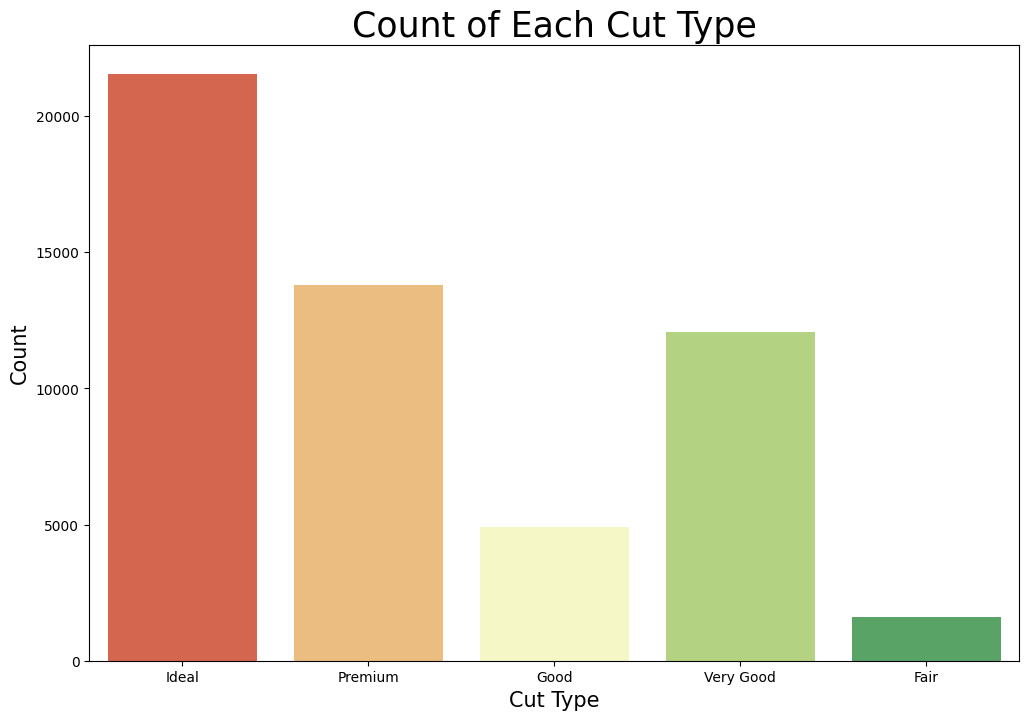

In [58]:
plt.figure(figsize=(12,8));
sns.countplot(x='cut',data=df,palette='RdYlGn');
plt.title('Count of Each Cut Type',fontsize=25,fontweight=5);
plt.xlabel('Cut Type',fontsize=15,fontweight=3);
plt.ylabel('Count',fontsize=15,fontweight=3);

/var/folders/gb/jt5_zmnn1j314xb6rr8zgwj00000gn/T/ipykernel_40797/2713223140.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='color',data=df,palette='RdYlGn');


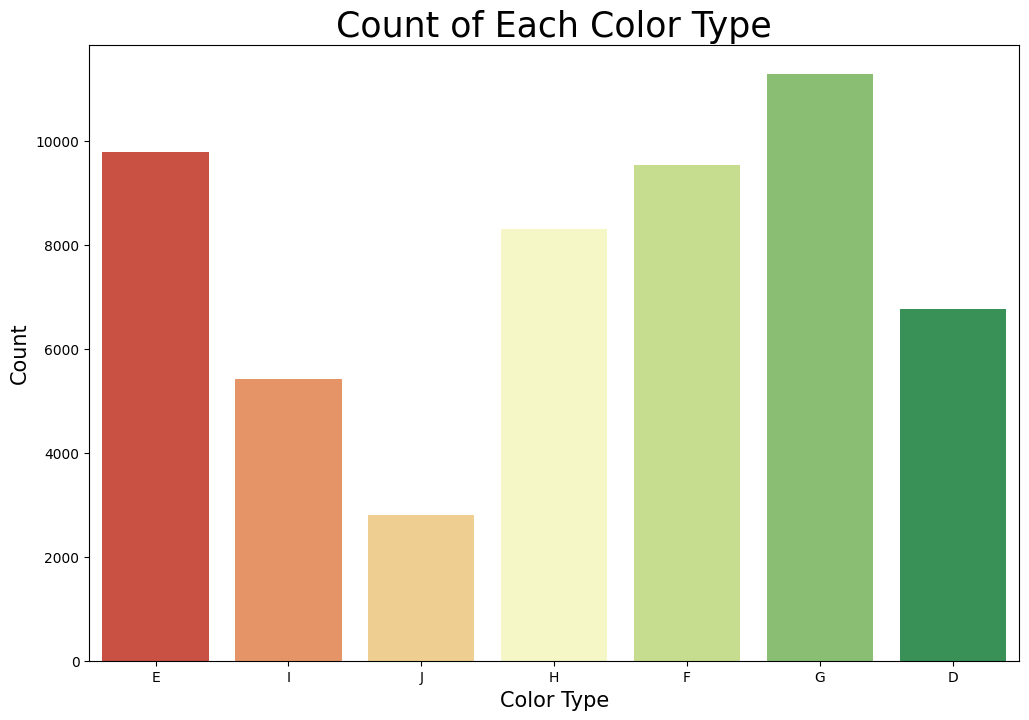

In [59]:
plt.figure(figsize=(12,8));
sns.countplot(x='color',data=df,palette='RdYlGn');
plt.title('Count of Each Color Type',fontsize=25,fontweight=5);
plt.xlabel('Color Type',fontsize=15,fontweight=3);
plt.ylabel('Count',fontsize=15,fontweight=3);

/var/folders/gb/jt5_zmnn1j314xb6rr8zgwj00000gn/T/ipykernel_40797/3558628651.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='clarity',data=df,palette='RdYlGn');


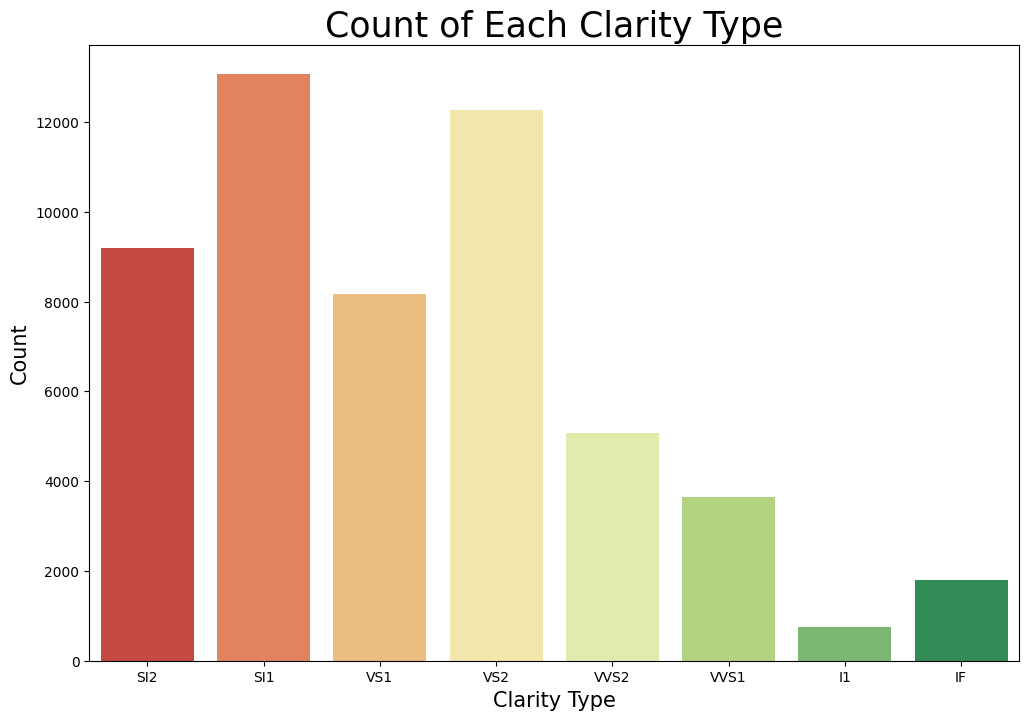

In [60]:
plt.figure(figsize=(12,8));
sns.countplot(x='clarity',data=df,palette='RdYlGn');
plt.title('Count of Each Clarity Type',fontsize=25,fontweight=5);
plt.xlabel('Clarity Type',fontsize=15,fontweight=3);
plt.ylabel('Count',fontsize=15,fontweight=3);

<p style="color:#000; font-size:18px;">Let's encode these features and move to further analysis</p>

In [61]:
encoder = LabelEncoder()

In [62]:
df['cut'] = encoder.fit_transform(df['cut'])
df['color'] = encoder.fit_transform(df['color'])
df['clarity'] = encoder.fit_transform(df['clarity'])

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  int64  
 2   color    53943 non-null  int64  
 3   clarity  53943 non-null  int64  
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.1 MB


<p style="color:#000; font-size:18px;">All our data is of numeric type now!</p>

<p style="background-color:#e6d8c8;color:#000;font-family:newtimeroman;font-size:180%;text-align:center;border-radius:10px 10px; padding:10px;">Correlation Heatmap</p>
<div style="text-align:center">
<p style="color:#000; font-size:18px; text-align:center;">Correlation is used to find the relation between 2 features.</p>
<img src="https://www.alpharithms.com/wp-content/uploads/1074/simplified-correlation-coefficient-formula-vs-expanded.jpg" width="500px">
<p style="color:#000; font-size:18px; text-align:center;">A value greater than 0.5 shows strong positive correlation while a value than -0.5 shows strong negative correlation</p>
<img src = "https://cdn.scribbr.com/wp-content/uploads/2022/05/Strong-positive-correlation-and-strong-negative-correlation.webp" width="500px">
</div>

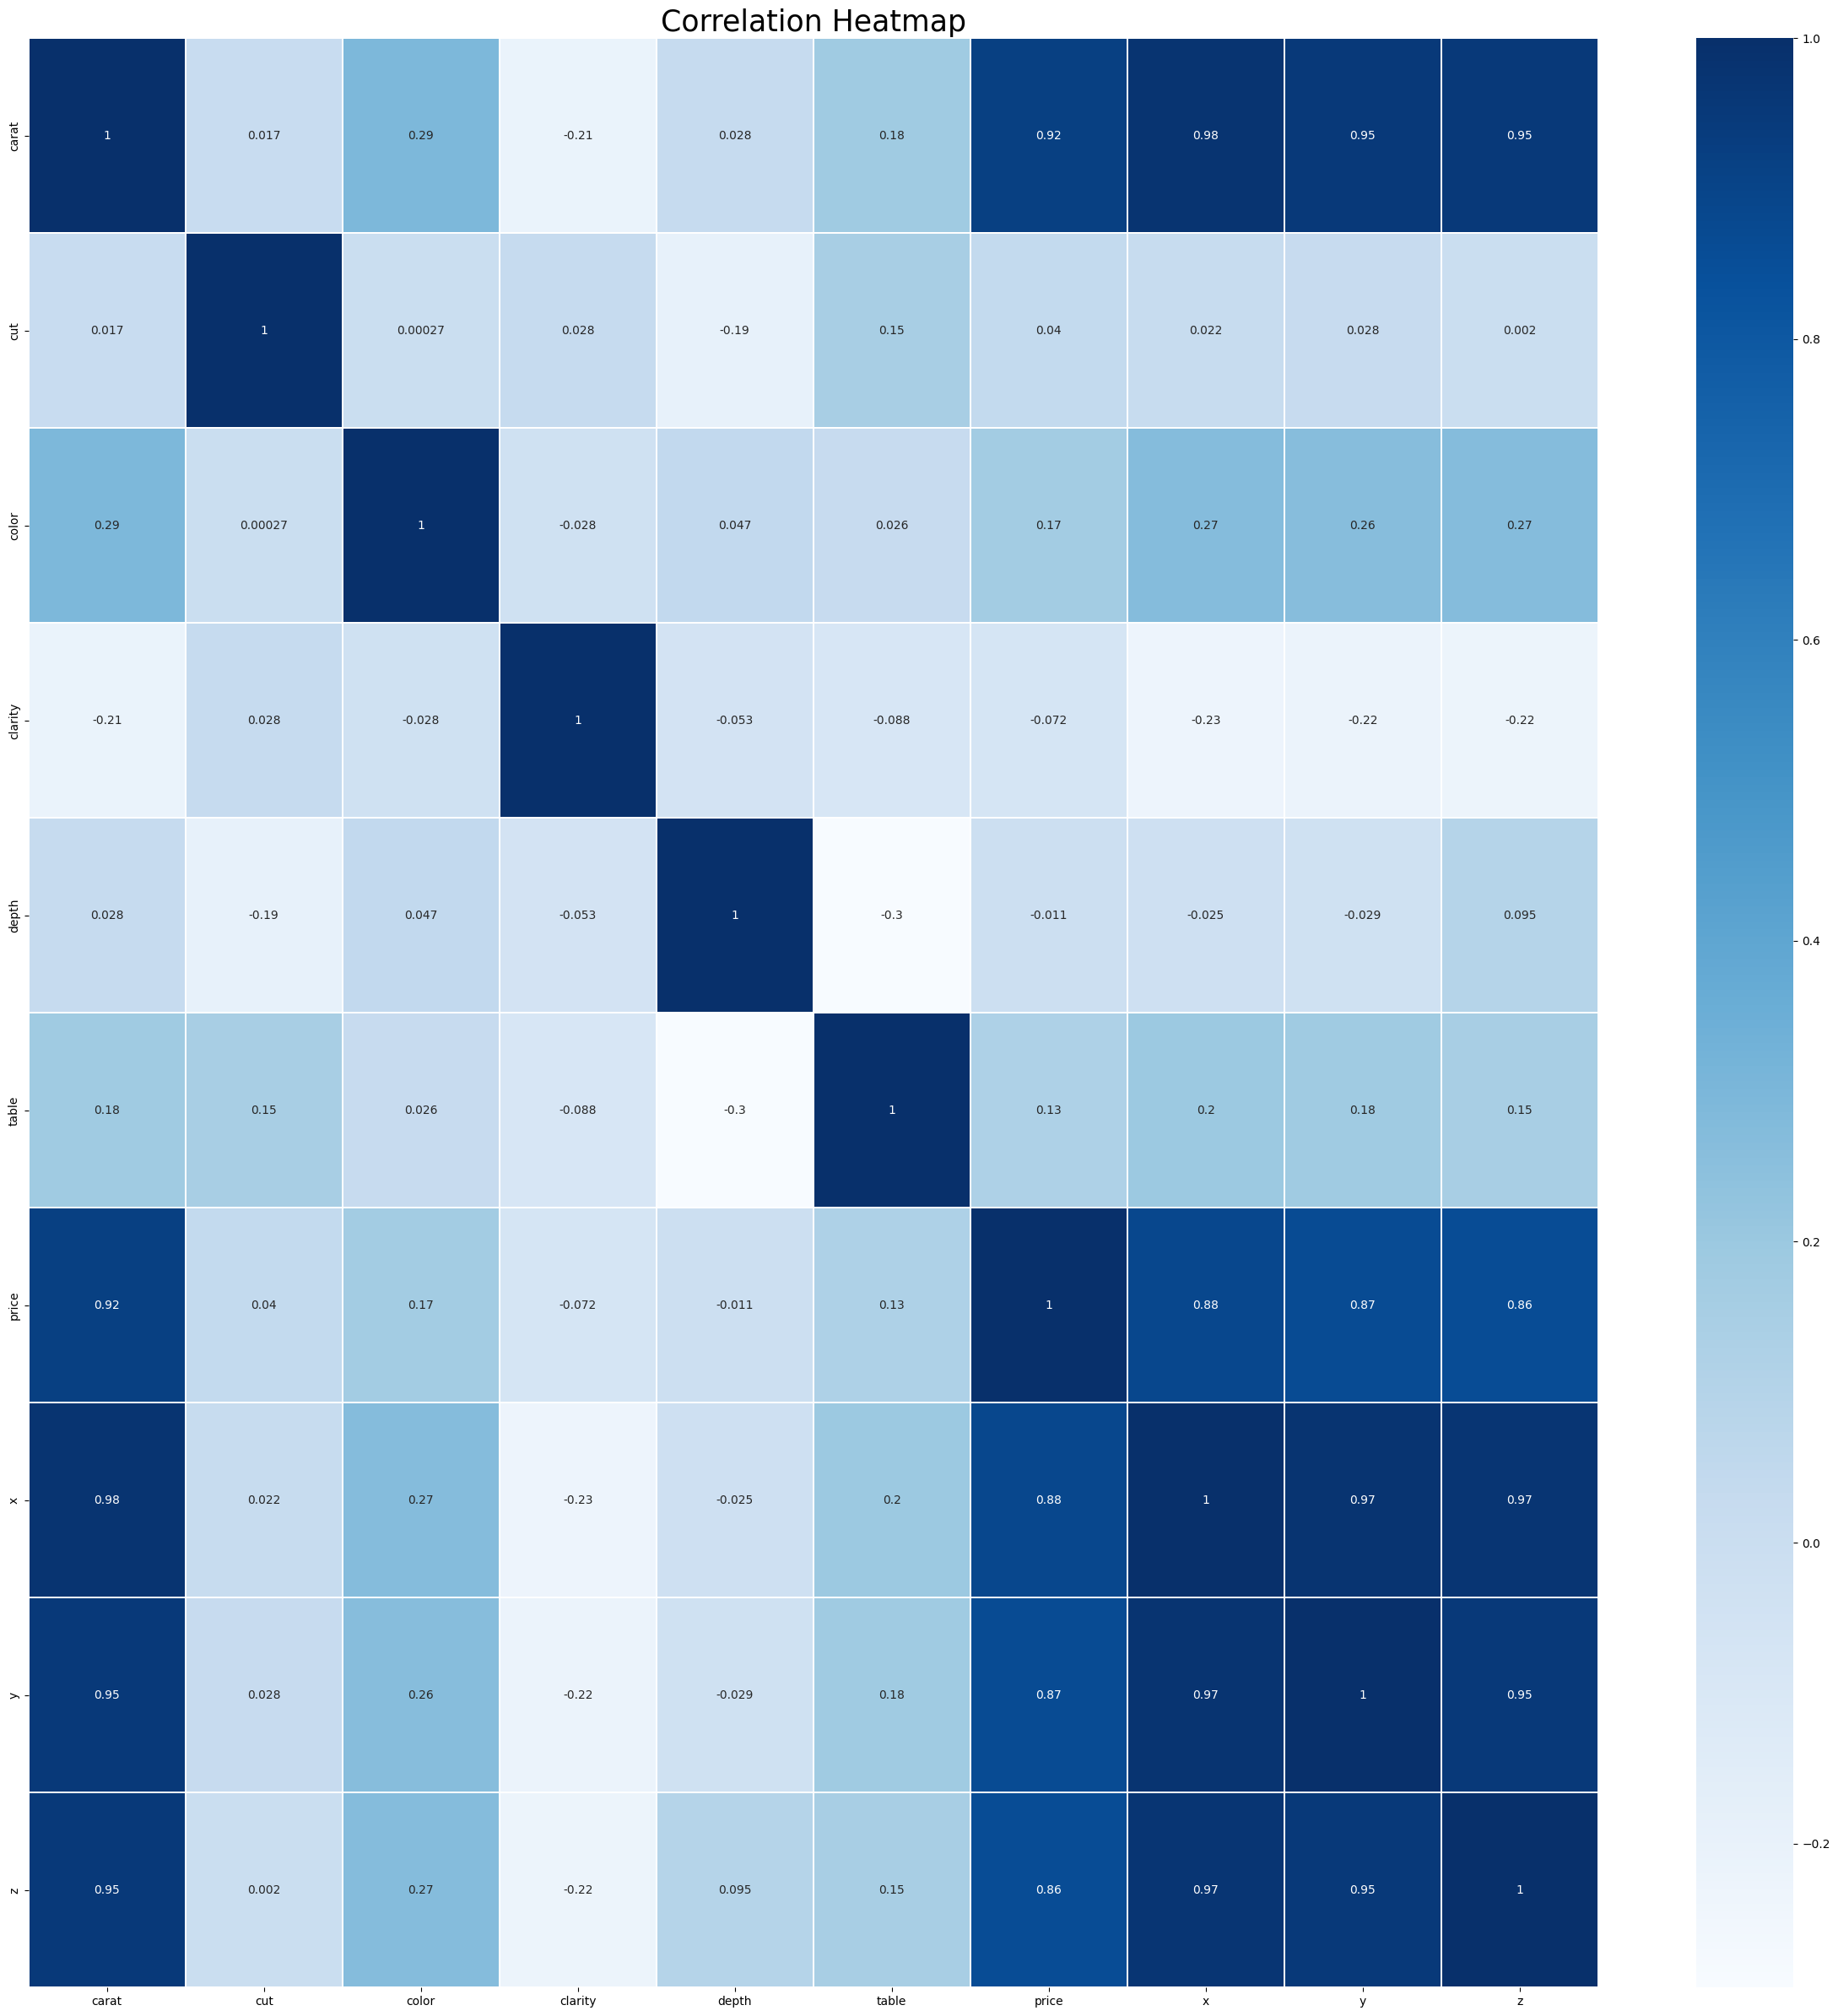

In [64]:
plt.figure(figsize=(30,30));
sns.heatmap(df.corr(),annot=True,cmap='Blues',linewidth=0.01);
plt.title('Correlation Heatmap',fontsize=25,fontweight=5);

<p style="color:#000; font-size:18px;">Our problem statement is predicting price of diamond.<br>
    So if we look at the price feature in the above correlation matrix, we can see that it is highly correlated with the <b>carat,x,y & z</b> features.<br>
Let's see this correlation using a scatterplot</p>

/var/folders/gb/jt5_zmnn1j314xb6rr8zgwj00000gn/T/ipykernel_40797/3753951130.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='price',y=col,data=df,palette='cool');


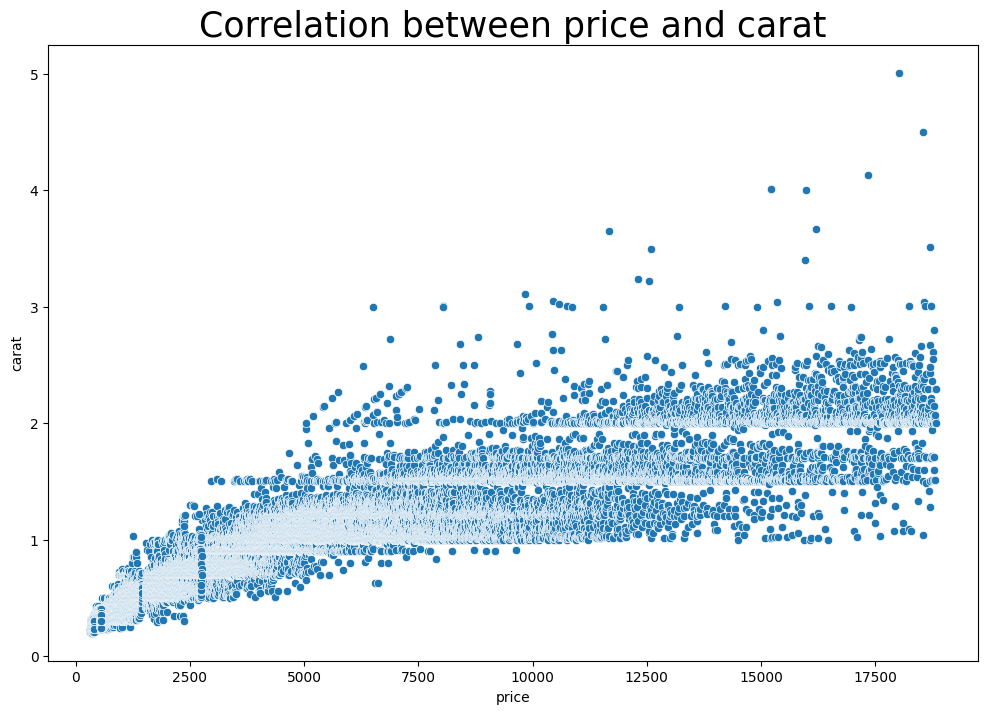

/var/folders/gb/jt5_zmnn1j314xb6rr8zgwj00000gn/T/ipykernel_40797/3753951130.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='price',y=col,data=df,palette='cool');


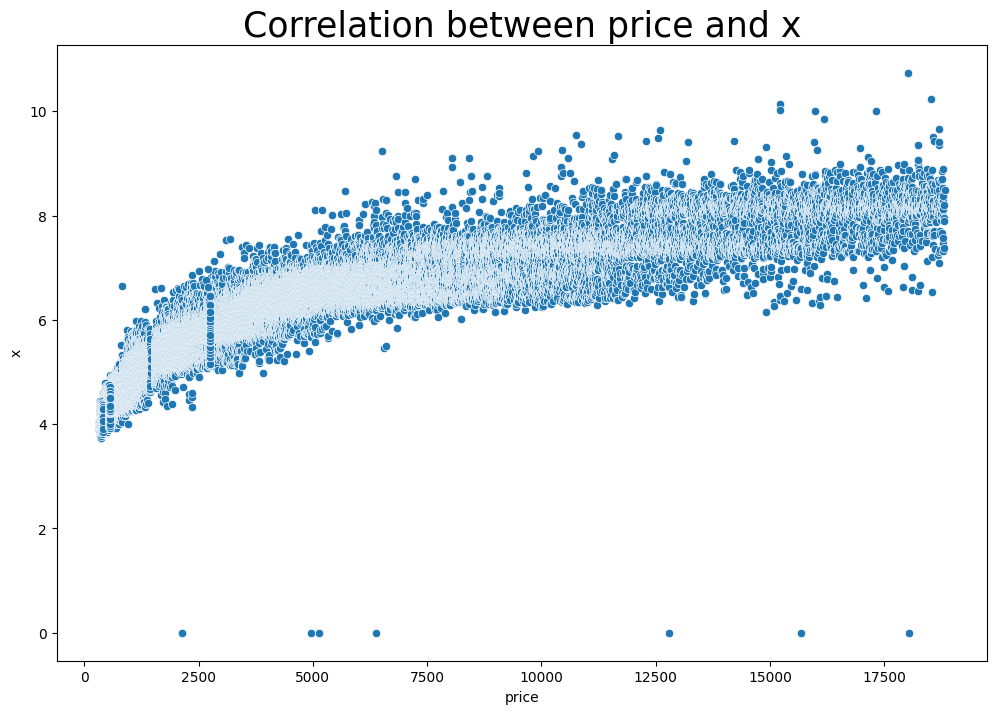

/var/folders/gb/jt5_zmnn1j314xb6rr8zgwj00000gn/T/ipykernel_40797/3753951130.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='price',y=col,data=df,palette='cool');


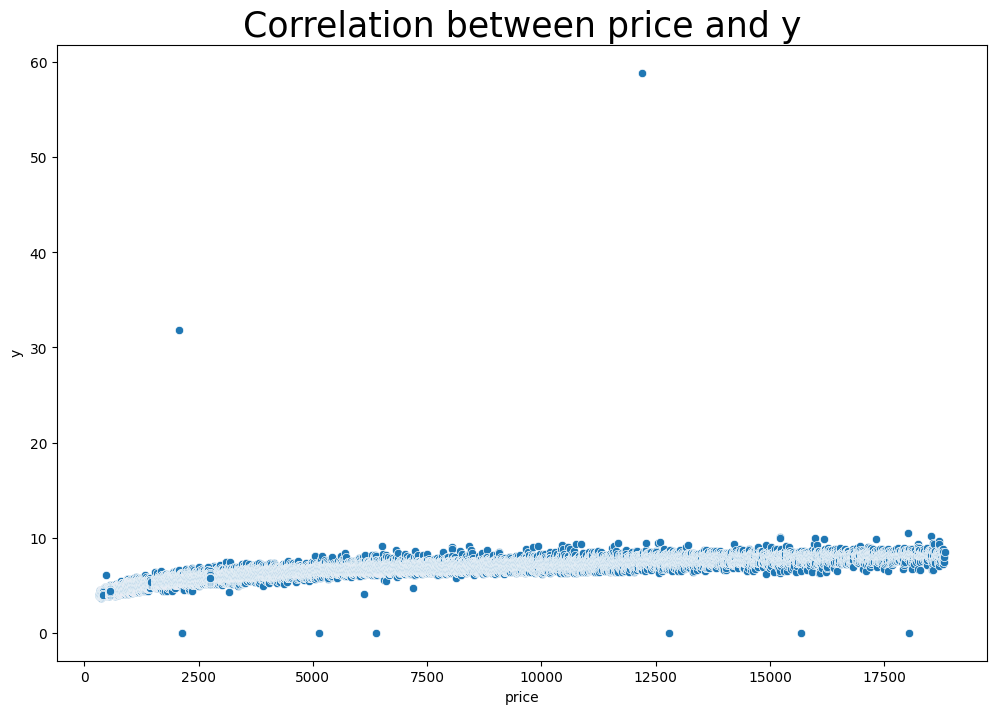

/var/folders/gb/jt5_zmnn1j314xb6rr8zgwj00000gn/T/ipykernel_40797/3753951130.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='price',y=col,data=df,palette='cool');


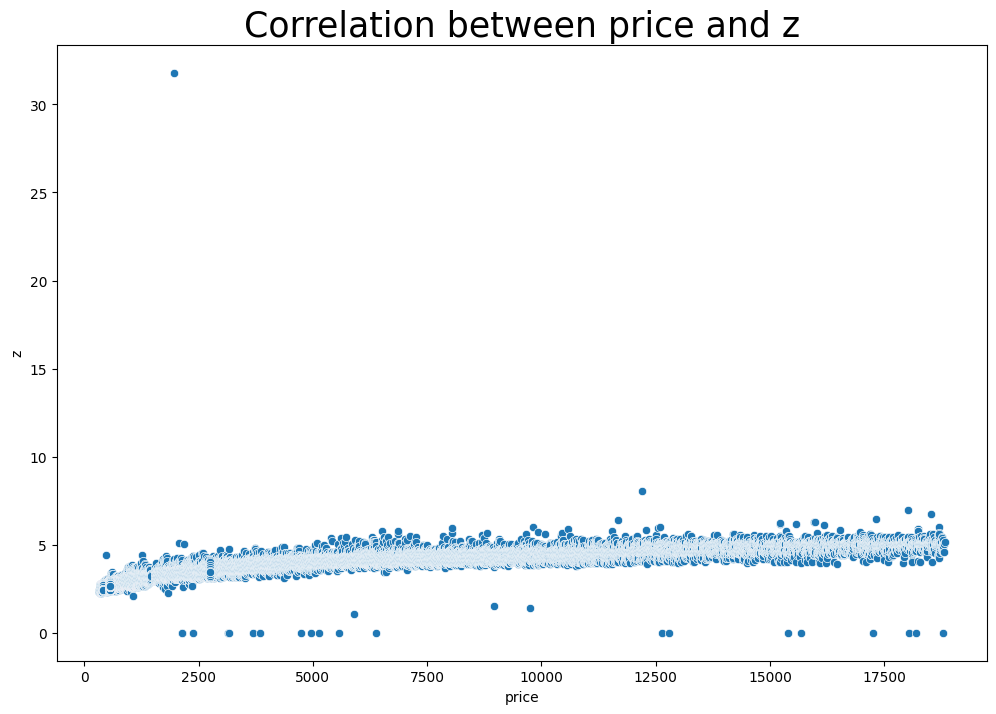

In [65]:
for col in ['carat','x','y','z']:
    plt.figure(figsize=(12,8));
    sns.scatterplot(x='price',y=col,data=df,palette='cool');
    plt.title(f'Correlation between price and {col}',fontsize=25,fontweight=5);
    plt.show()

<p style="color:#000; font-size:18px;">As seen in the correlation heatmap, the relation is clearly visible</p>

<p style="background-color:#e6d8c8;color:#000;font-family:newtimeroman;font-size:180%;text-align:center;border-radius:10px 10px; padding:10px;">Box Plot</p>
<div style="text-align:center">
<p style="color:#000; font-size:18px; text-align:center;">A Box Plot is used to find outliers or values that are too big to too less.<br>These values can affect the performance of our regression model.</p>
<img src="https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png" width="1000px">
<p style="color:#000; font-size:18px;">A box plot finds the IQR(Interquartile range). Most of the data lies in this range and based on the Q1 and Q3 values, the minimum and maximum values are calculated. Note these values are not the minimum/maximum of the feature. These minimum/maximum are calculated by the boxplot using Q1,Q3 and any value outside our box range is an outlier.</p>

</div>

/var/folders/gb/jt5_zmnn1j314xb6rr8zgwj00000gn/T/ipykernel_40797/1285503313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(y=col,data=df,palette='cool');


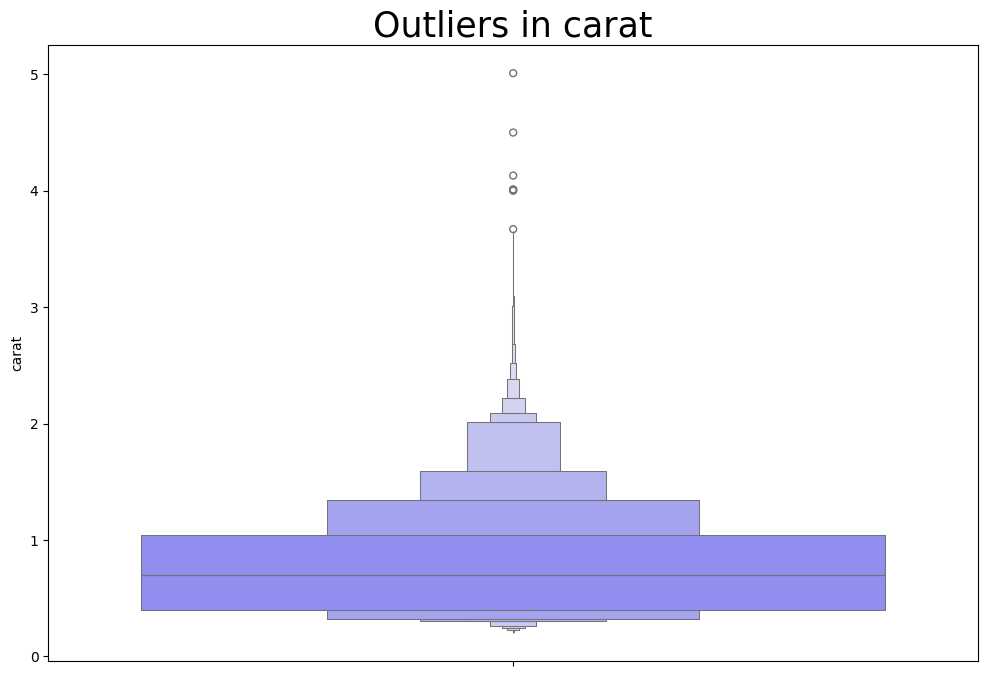

/var/folders/gb/jt5_zmnn1j314xb6rr8zgwj00000gn/T/ipykernel_40797/1285503313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(y=col,data=df,palette='cool');


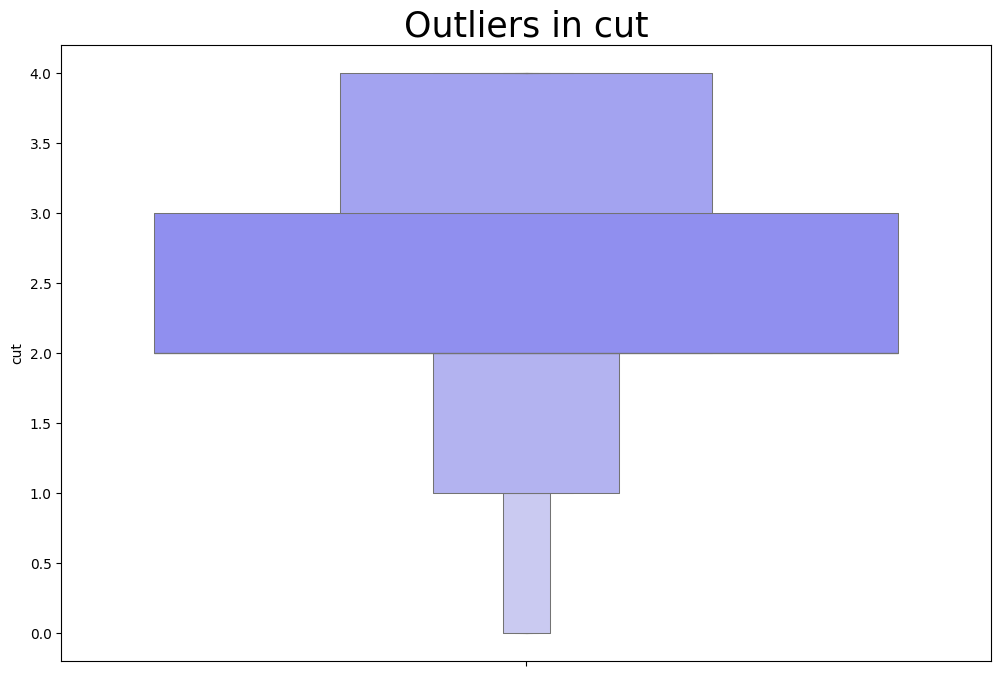

/var/folders/gb/jt5_zmnn1j314xb6rr8zgwj00000gn/T/ipykernel_40797/1285503313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(y=col,data=df,palette='cool');


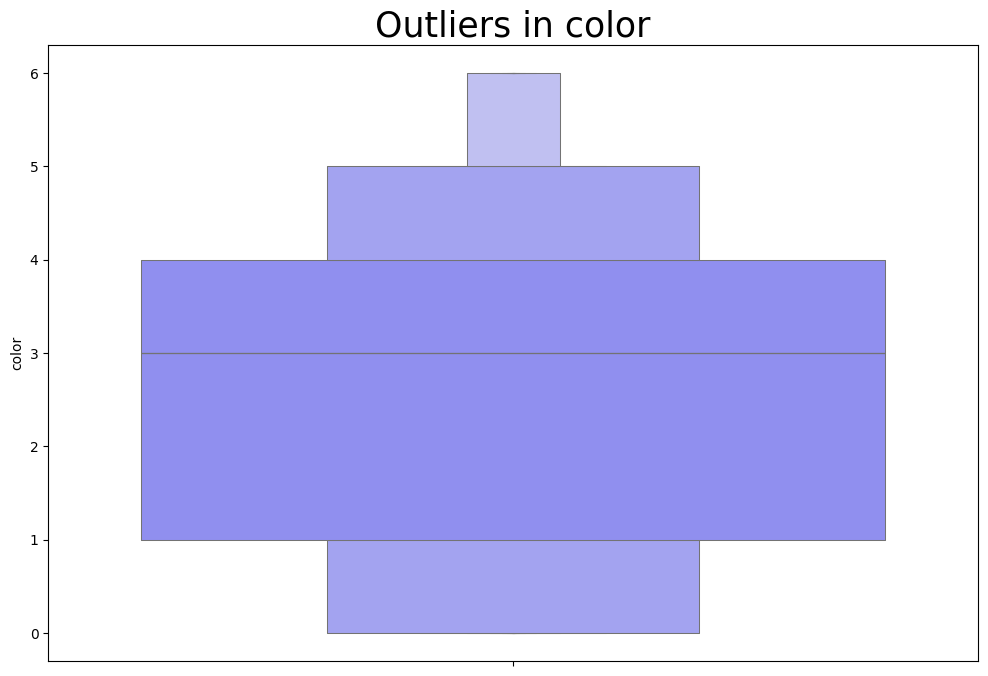

/var/folders/gb/jt5_zmnn1j314xb6rr8zgwj00000gn/T/ipykernel_40797/1285503313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(y=col,data=df,palette='cool');


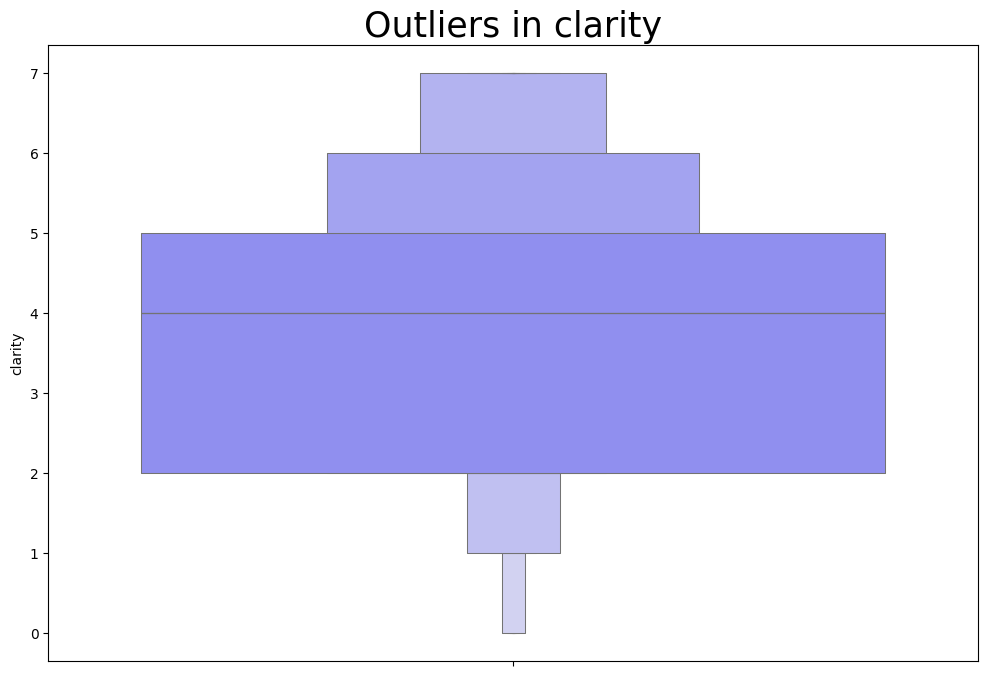

/var/folders/gb/jt5_zmnn1j314xb6rr8zgwj00000gn/T/ipykernel_40797/1285503313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(y=col,data=df,palette='cool');


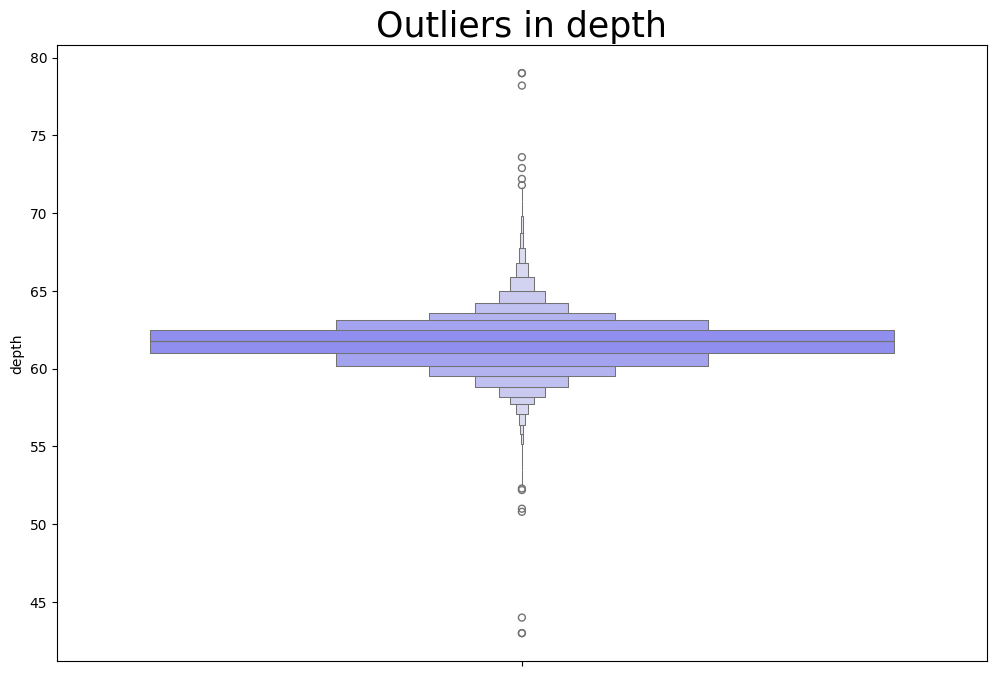

/var/folders/gb/jt5_zmnn1j314xb6rr8zgwj00000gn/T/ipykernel_40797/1285503313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(y=col,data=df,palette='cool');


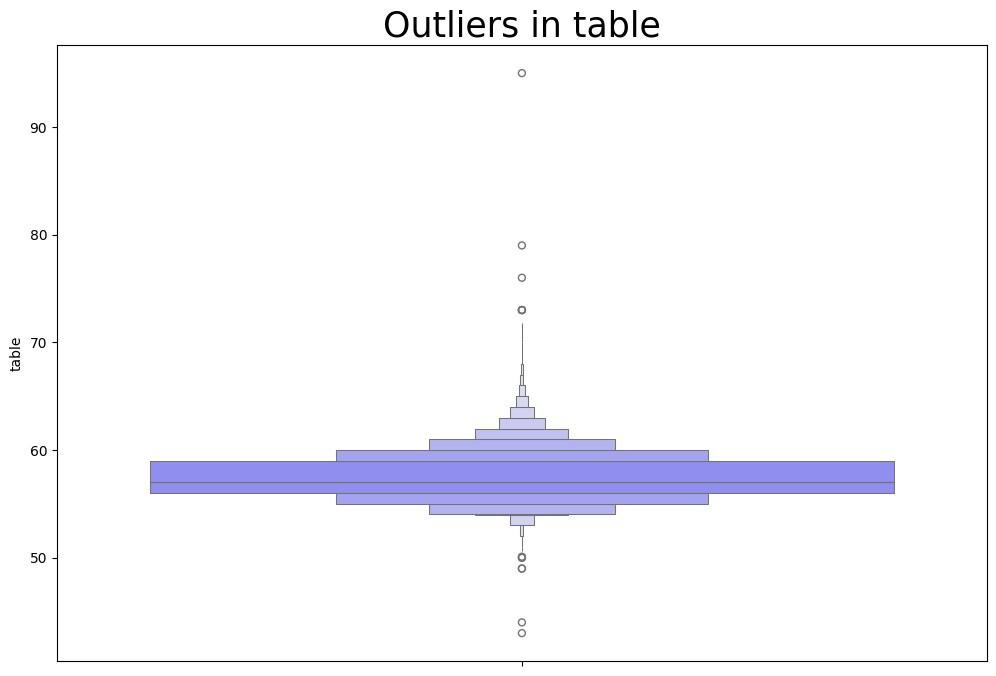

/var/folders/gb/jt5_zmnn1j314xb6rr8zgwj00000gn/T/ipykernel_40797/1285503313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(y=col,data=df,palette='cool');


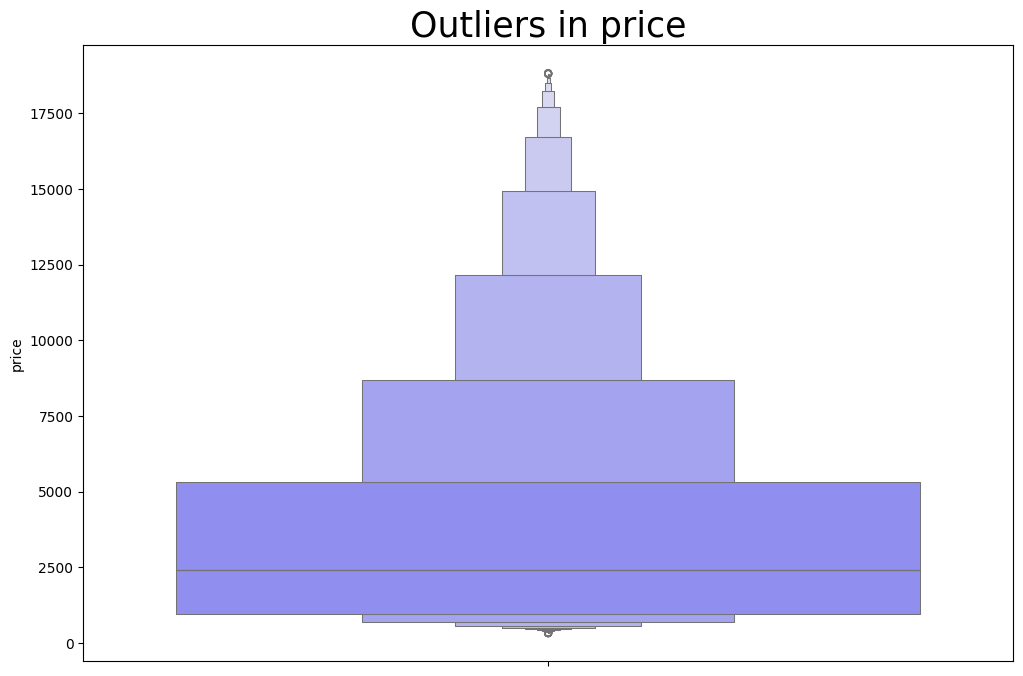

/var/folders/gb/jt5_zmnn1j314xb6rr8zgwj00000gn/T/ipykernel_40797/1285503313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(y=col,data=df,palette='cool');


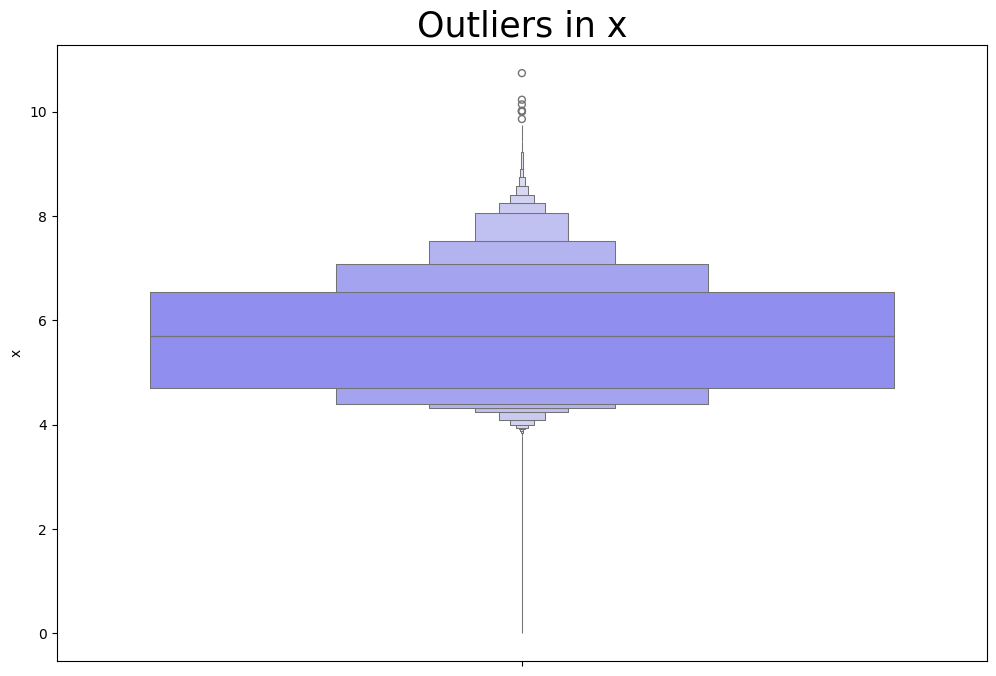

/var/folders/gb/jt5_zmnn1j314xb6rr8zgwj00000gn/T/ipykernel_40797/1285503313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(y=col,data=df,palette='cool');


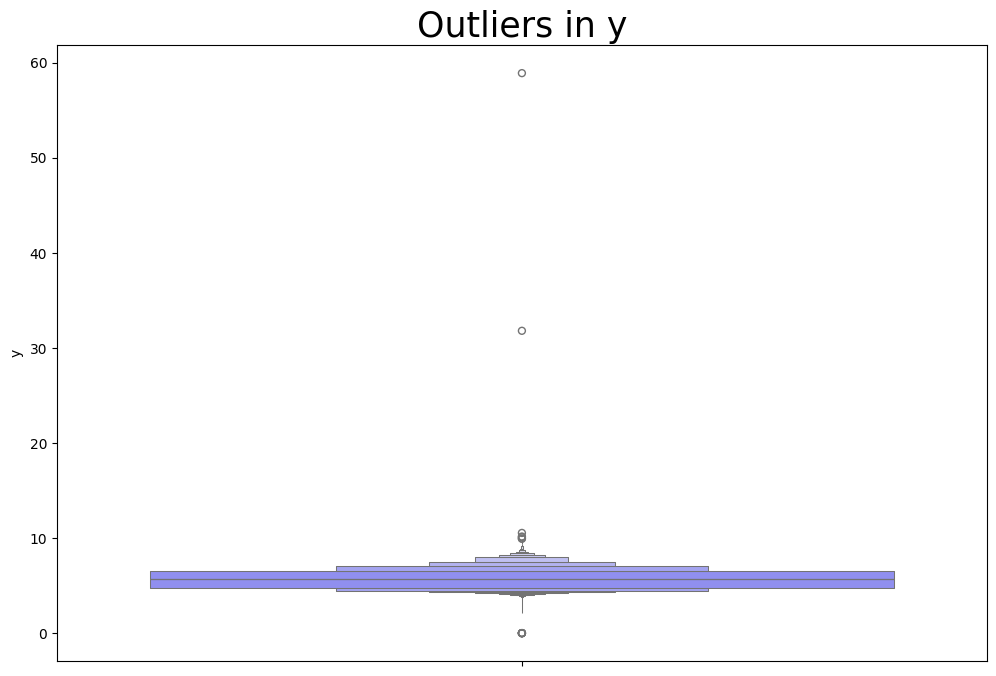

/var/folders/gb/jt5_zmnn1j314xb6rr8zgwj00000gn/T/ipykernel_40797/1285503313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(y=col,data=df,palette='cool');


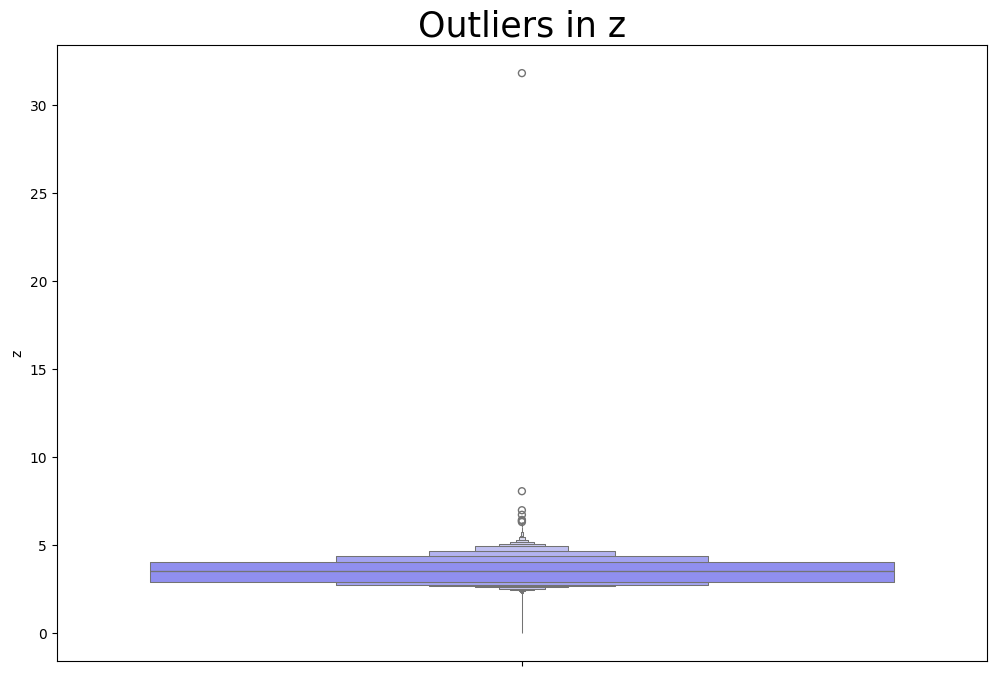

In [66]:
for col in df.columns:
    plt.figure(figsize=(12,8));
    sns.boxenplot(y=col,data=df,palette='cool');
    plt.title(f'Outliers in {col}',fontsize=25,fontweight=5);
    plt.show()

<p style="color:#000; font-size:18px;">I am going to remove most of the outliers using the Q1,Q3 values.</p>

In [67]:
for col in df.columns:
    #calculating Q1 for the feature
    q1 = df[col].quantile(0.25)
    #calculating Q3 for the feature
    q3 = df[col].quantile(0.75)

    #Calculating the IQR value
    iqr = q3-q1
    # Calculating min/max value based on IQR
    minn = q1-1.5*iqr
    maxx = q3+1.5*iqr

    # Filtering values only in the min-max range
    df = df[(df[col] >= minn) & (df[col] <= maxx)]

#     print(col,q25-1.5*mean,q25,mean,q75,q75+1.5*mean)

In [68]:
df.shape

(46599, 10)

<p style="color:#000; font-size:18px;">We almost lost 1K rows but that's fine since we still have a lot of data for modelling.</p>

/var/folders/gb/jt5_zmnn1j314xb6rr8zgwj00000gn/T/ipykernel_40797/1285503313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(y=col,data=df,palette='cool');


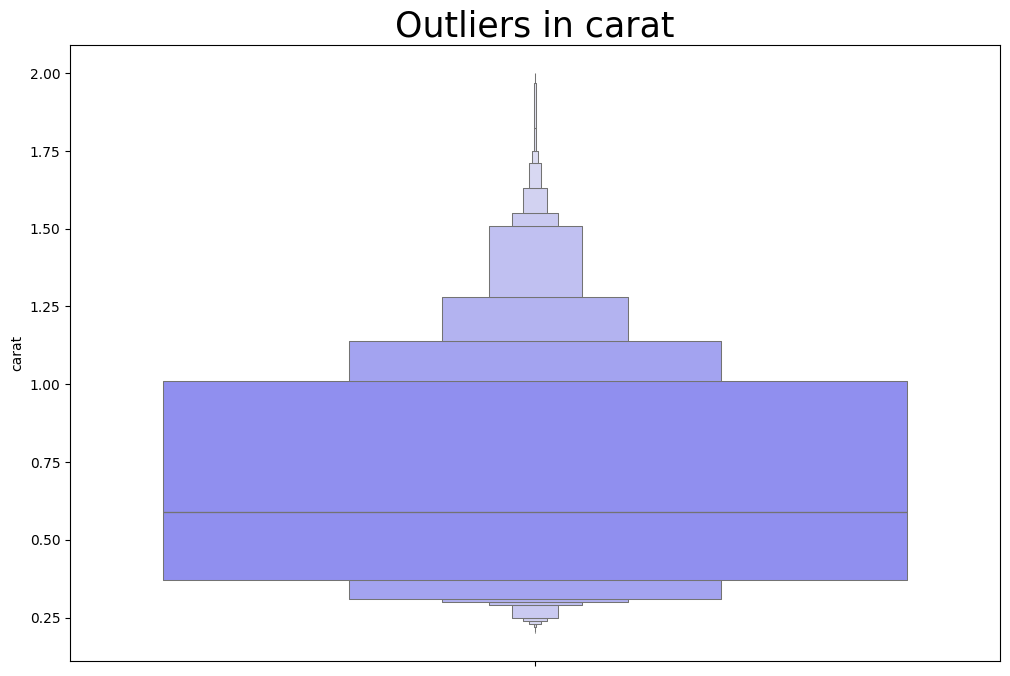

/var/folders/gb/jt5_zmnn1j314xb6rr8zgwj00000gn/T/ipykernel_40797/1285503313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(y=col,data=df,palette='cool');


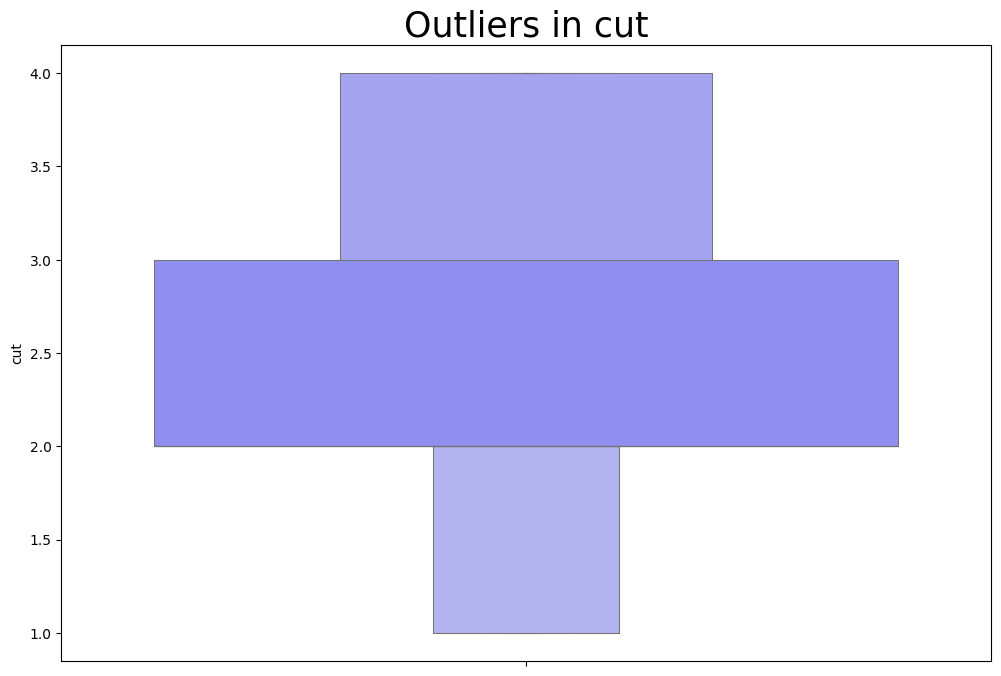

/var/folders/gb/jt5_zmnn1j314xb6rr8zgwj00000gn/T/ipykernel_40797/1285503313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(y=col,data=df,palette='cool');


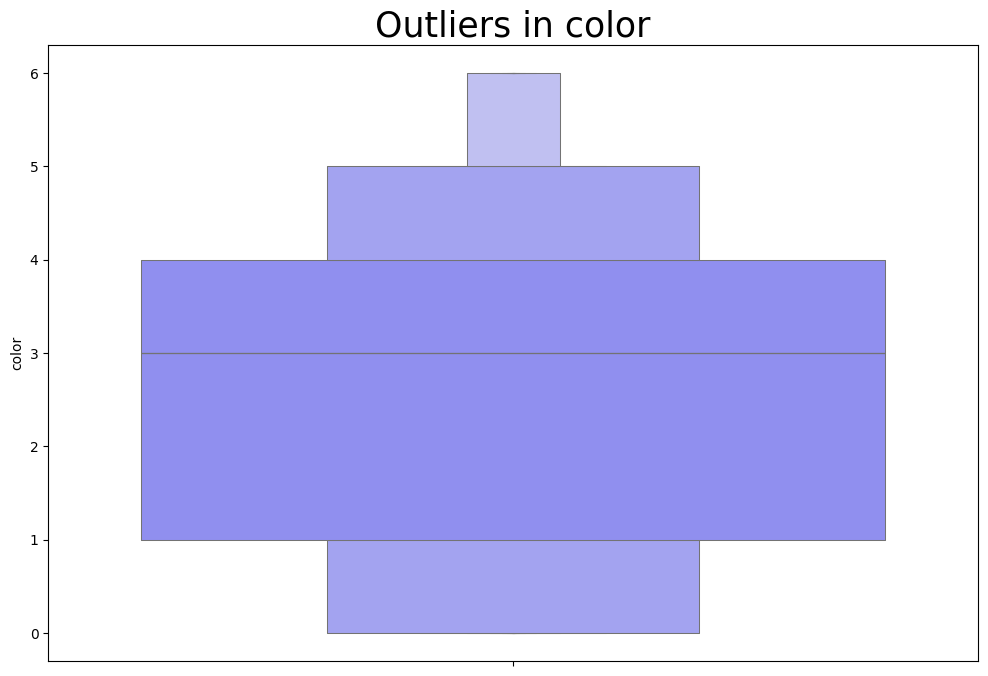

/var/folders/gb/jt5_zmnn1j314xb6rr8zgwj00000gn/T/ipykernel_40797/1285503313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(y=col,data=df,palette='cool');


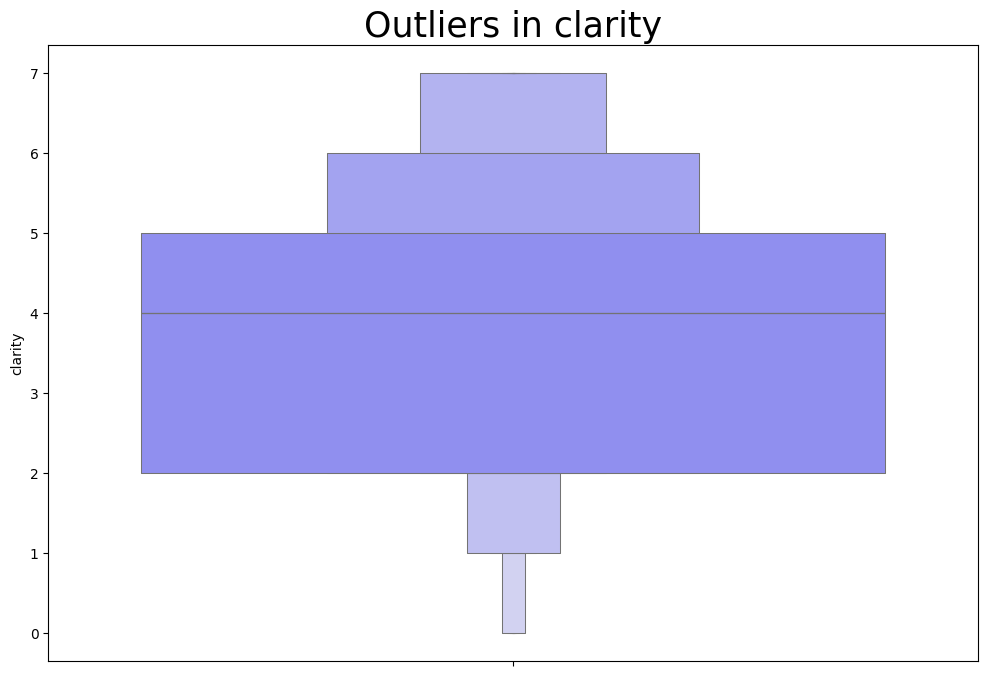

/var/folders/gb/jt5_zmnn1j314xb6rr8zgwj00000gn/T/ipykernel_40797/1285503313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(y=col,data=df,palette='cool');


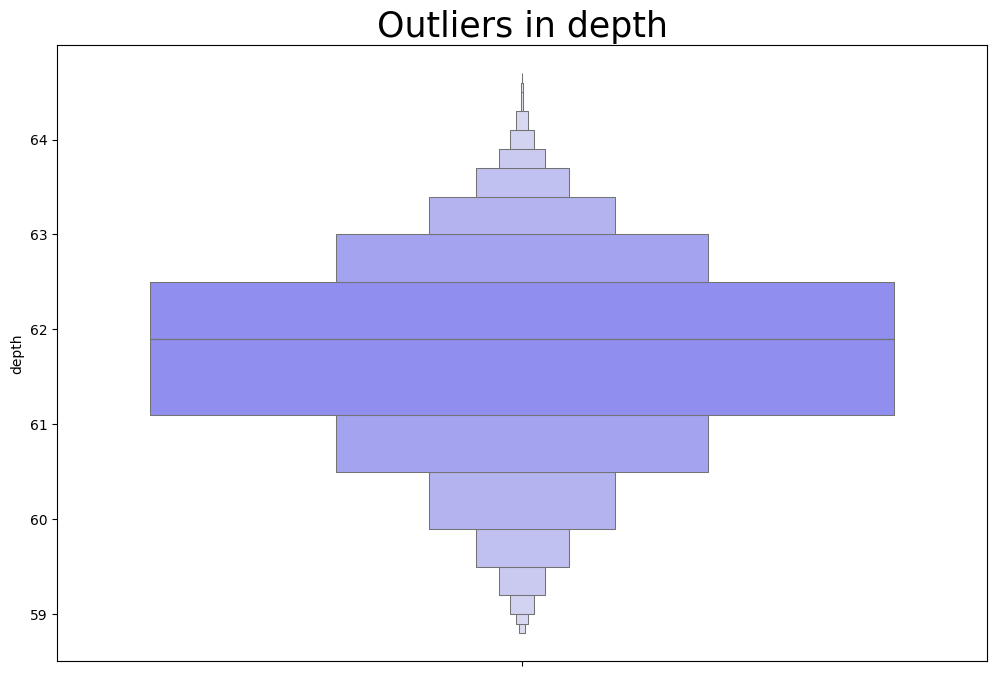

/var/folders/gb/jt5_zmnn1j314xb6rr8zgwj00000gn/T/ipykernel_40797/1285503313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(y=col,data=df,palette='cool');


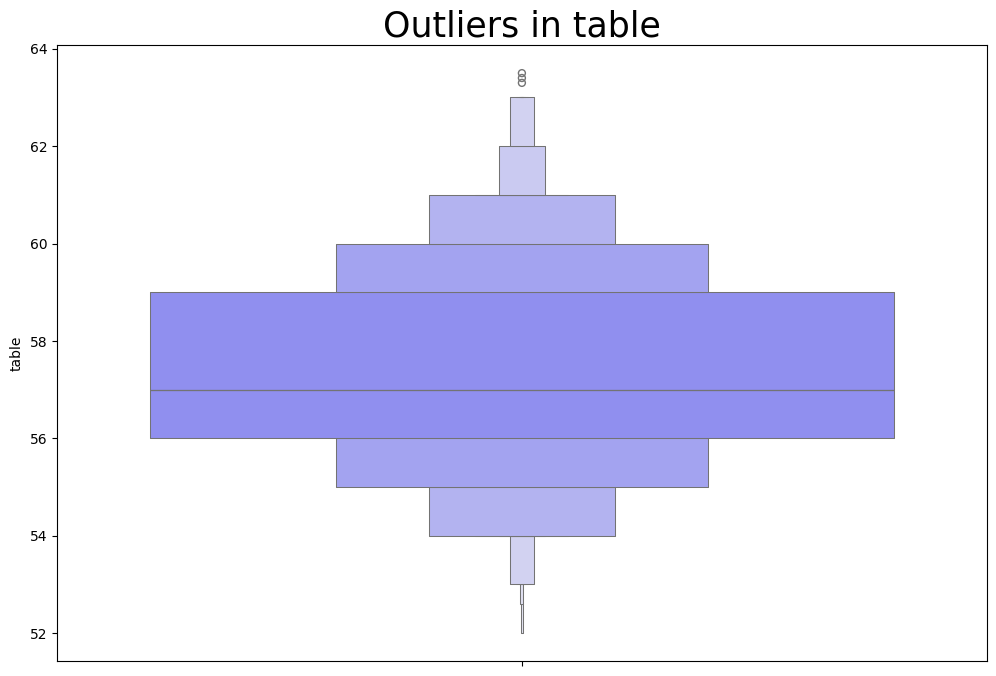

/var/folders/gb/jt5_zmnn1j314xb6rr8zgwj00000gn/T/ipykernel_40797/1285503313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(y=col,data=df,palette='cool');


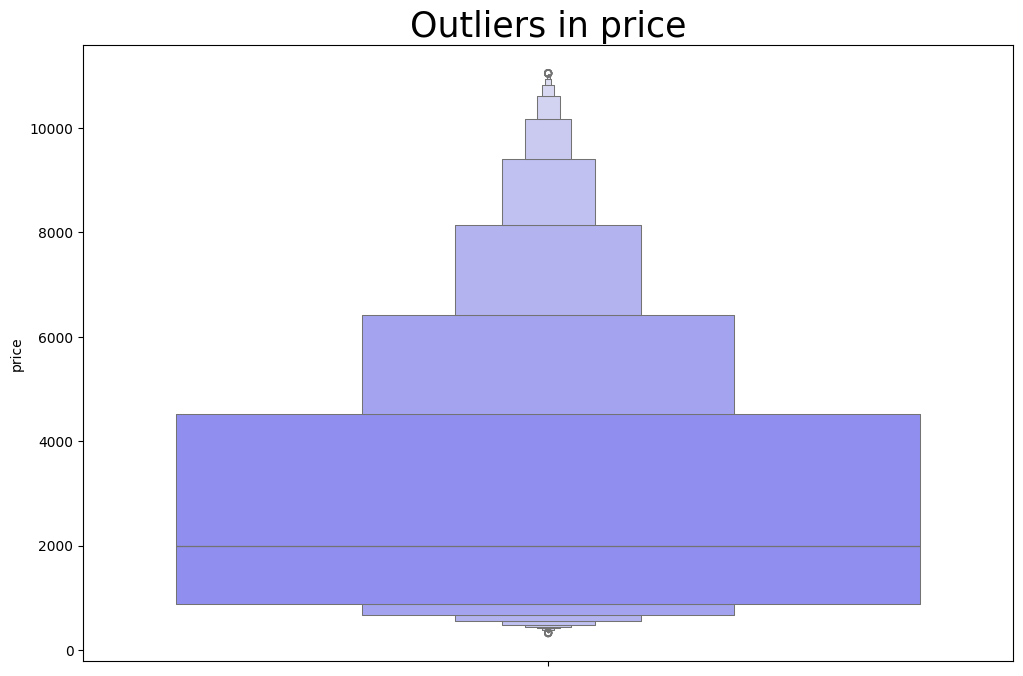

/var/folders/gb/jt5_zmnn1j314xb6rr8zgwj00000gn/T/ipykernel_40797/1285503313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(y=col,data=df,palette='cool');


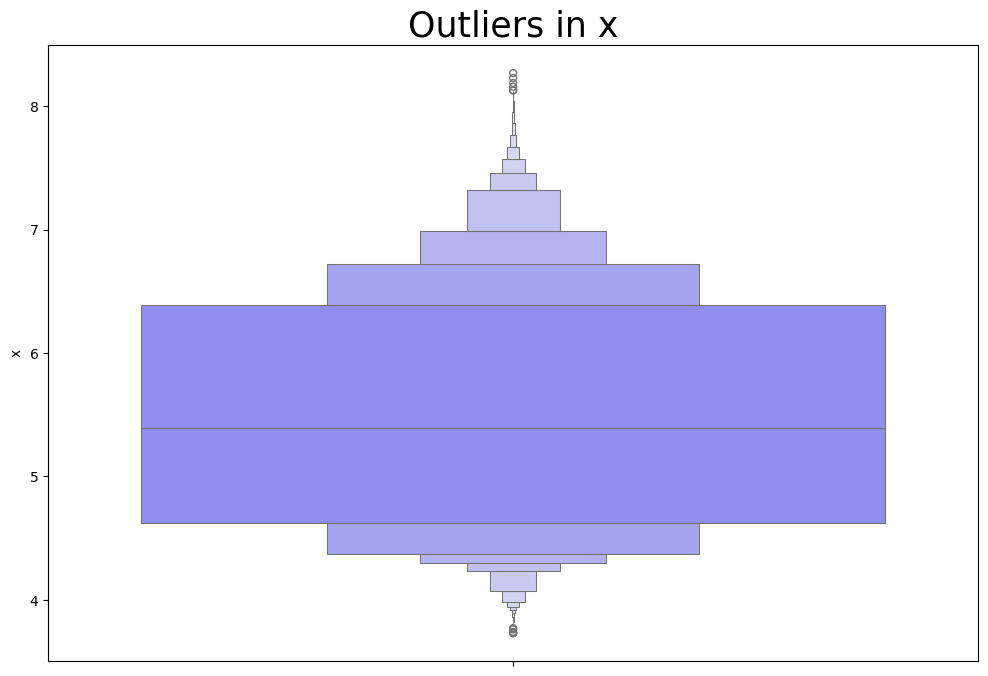

/var/folders/gb/jt5_zmnn1j314xb6rr8zgwj00000gn/T/ipykernel_40797/1285503313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(y=col,data=df,palette='cool');


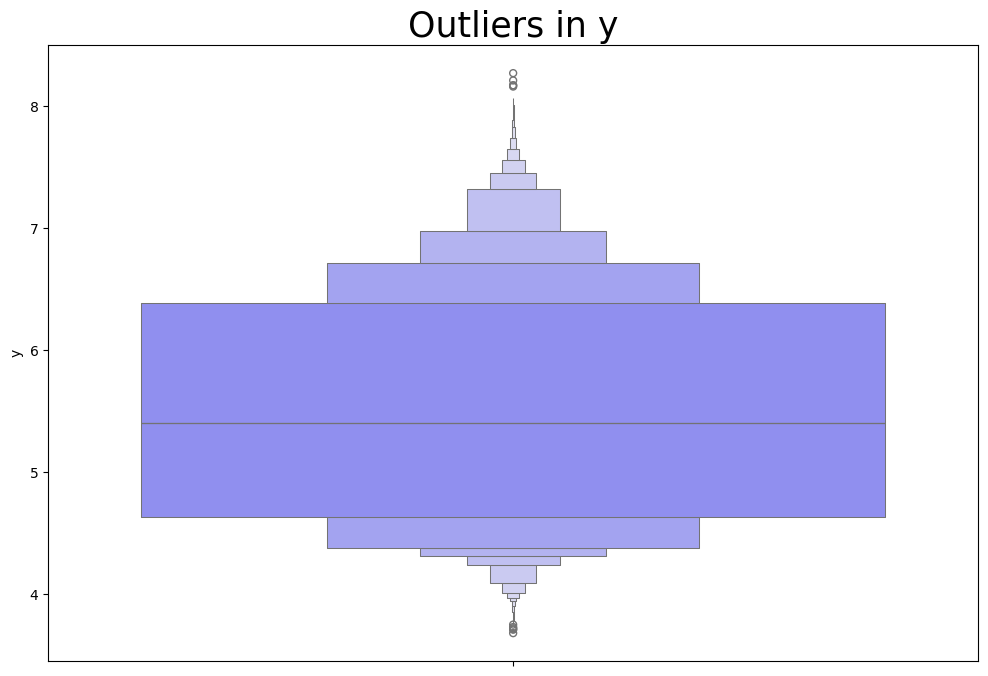

/var/folders/gb/jt5_zmnn1j314xb6rr8zgwj00000gn/T/ipykernel_40797/1285503313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(y=col,data=df,palette='cool');


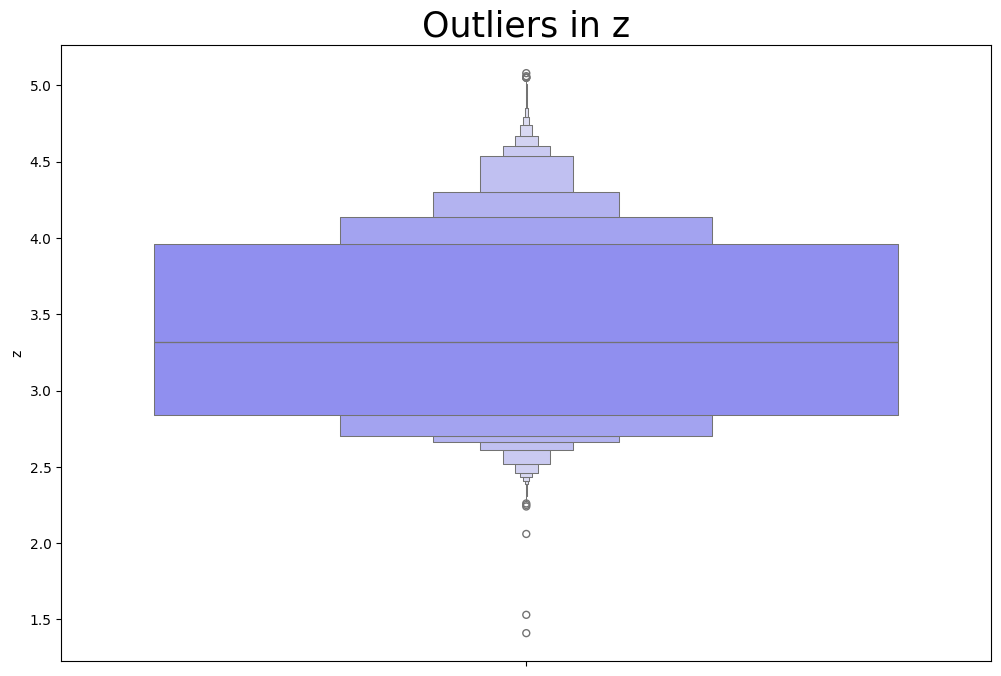

In [69]:
for col in df.columns:
    plt.figure(figsize=(12,8));
    sns.boxenplot(y=col,data=df,palette='cool');
    plt.title(f'Outliers in {col}',fontsize=25,fontweight=5);
    plt.show()

<a id='section-5'></a>
<p style="background-color:#f2e9ee;color:#000;font-family:newtimeroman;font-size:200%;text-align:center;border-radius:10px 10px; padding:10px;">Encoding and Normalization</p>

<p style="text-align:center;">
<a href="#section-0" style="background-color:#000;color:#fff;font-family:newtimeroman;text-align:center;border-radius:10px 10px; padding:10px;">Back To Top</a>
</p>

In [70]:
X = df.drop(['price'],axis=1)
y=df['price']

In [71]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1)

In [72]:
scaler = MinMaxScaler()

In [73]:
normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)

In [74]:
normalized_x_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.472222,1.000000,0.500000,0.428571,0.644068,0.877193,0.599119,0.612200,0.719346
1,0.283333,1.000000,1.000000,0.285714,0.067797,0.526316,0.469163,0.483660,0.564033
2,0.066667,1.000000,0.166667,0.285714,0.728814,0.175439,0.149780,0.150327,0.370572
3,0.144444,0.000000,0.000000,0.714286,0.745763,0.350877,0.255507,0.270153,0.460490
4,0.455556,0.333333,0.666667,0.428571,0.508475,0.263158,0.603524,0.616558,0.708447


In [75]:
normalized_x_test = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns)

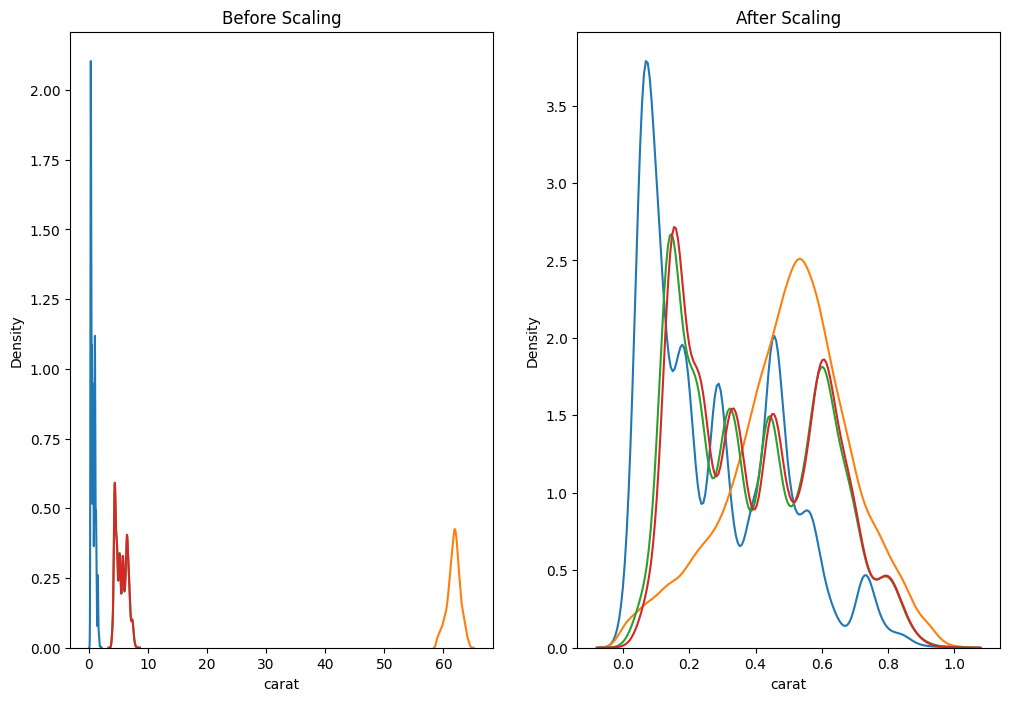

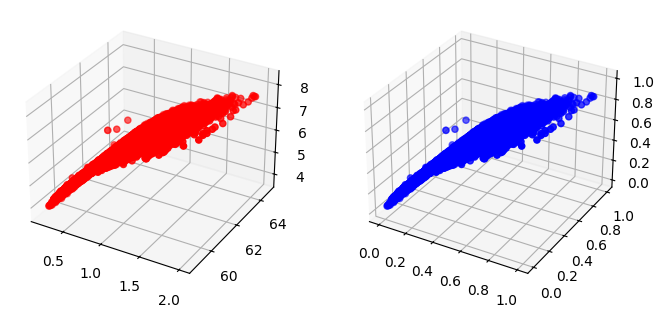

In [76]:
fig, (ob1, ob2) = plt.subplots(ncols=2,figsize=(12,8))
ob1.set_title('Before Scaling')
sns.kdeplot(X_train['carat'],ax=ob1)
sns.kdeplot(X_train['depth'],ax=ob1)
sns.kdeplot(X_train['x'],ax=ob1)
sns.kdeplot(X_train['y'],ax=ob1)

ob2.set_title('After Scaling')
sns.kdeplot(normalized_x_train['carat'],ax=ob2)
sns.kdeplot(normalized_x_train['depth'],ax=ob2)
sns.kdeplot(normalized_x_train['x'],ax=ob2)
sns.kdeplot(normalized_x_train['y'],ax=ob2)
plt.show()

fig = plt.figure(figsize=(8,6))
ob3 = fig.add_subplot(121,projection='3d')
ob4 = fig.add_subplot(122,projection='3d')
ob3.scatter(X_train['carat'],X_train['depth'],X_train['x'],color='red')
ob4.scatter(normalized_x_train['carat'],normalized_x_train['depth'],normalized_x_train['x'],color='blue')
plt.show()

<p style="color:#000066; font-size:16px;">Our data is now scaled so let's start modelling</p>

<a id='section-6'></a>
<p style="background-color:#f2e9ee;color:#000;font-family:newtimeroman;font-size:200%;text-align:center;border-radius:10px 10px; padding:10px;">Modelling</p>

<p style="text-align:center;">
<a href="#section-0" style="background-color:#000;color:#fff;font-family:newtimeroman;text-align:center;border-radius:10px 10px; padding:10px;">Back To Top</a>
</p>

In [77]:
d={}
def metric_scores(actual,predicted,name):

    """
    Function To evaluate and store the evaluation metric scores .
    Arguments to be passed:
    1. y_test
    2. y_pred
    3. name of the model
    """
    mae = mean_absolute_error(actual,predicted)
    mse = mean_squared_error(actual,predicted)
    mape = mean_absolute_percentage_error(actual,predicted)
    r2 = r2_score(actual,predicted)

    d[name]=[mae,mse,mape,r2]

    print('Mean Absolute Error is {:.3f}'.format(mae))
    print()
    print('Mean Squared Error is {:.3f}'.format(mse))
    print()
    print('Mean Absolute Percentage Error is {:.3f}'.format(mape))
    print()
    print('R Squared Error is {:.3f}'.format(r2))
    print()

In [78]:
def evaluate_model(x_test=None,y_test=None,model=None,name='Linear Regression',color='hotpink'):

    """
    A function to make predictions, evaluate the model and plot the regression line!!!
    The function requires the following values:
    1. x_test
    2. y_test
    3. model object
    4. Name of the model
    """

    predicted = model.predict(x_test)
    actual=y_test
    metric_scores(actual,predicted,name)
    plt.figure(figsize=(12,8))
    plt.scatter(actual, predicted, c=color)
    mxp,mxa,mnp,mna = max(predicted),max(actual),np.min(predicted),np.min(actual)
    p1 = mxp if mxp>mxa else mxa
    p2 = mnp if mnp<mna else mna
    plt.plot([p1, p2], [p1, p2],'#000066')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.title(name,fontsize=30)
    plt.axis('equal')
    plt.show()

In [79]:
lr = LinearRegression()
lr.fit(normalized_x_train,y_train)

LinearRegression()

Mean Absolute Error is 572.478

Mean Squared Error is 737566.700

Mean Absolute Percentage Error is 0.282

R Squared Error is 0.890



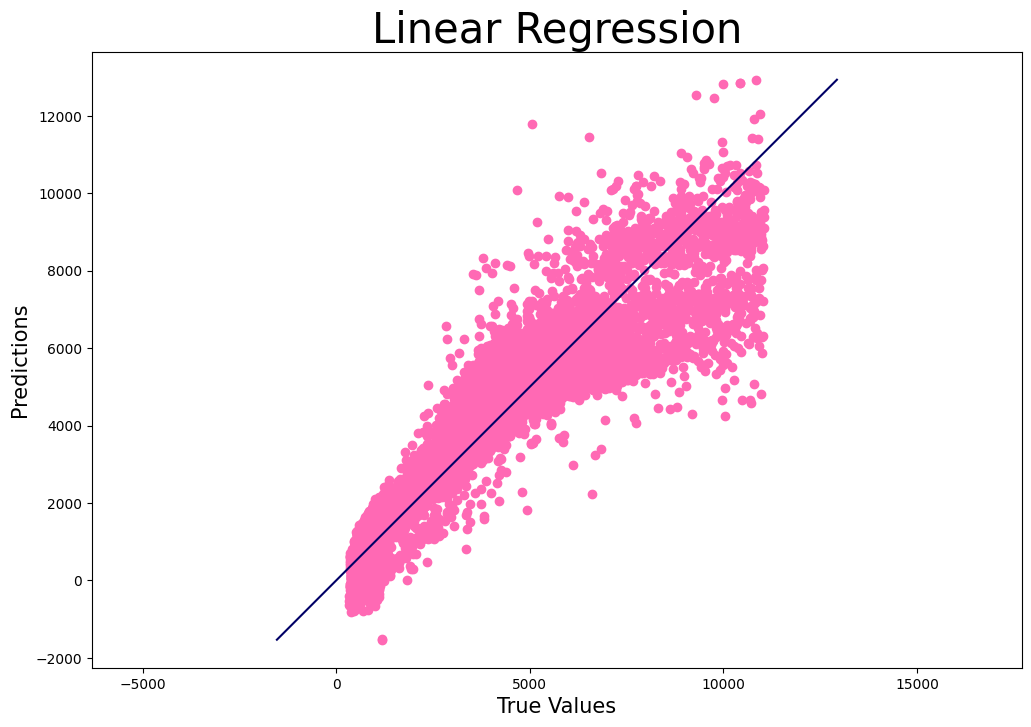

In [80]:
evaluate_model(x_test=normalized_x_test,y_test=y_test,model=lr,name='Linear Regression')

In [81]:
DR = DecisionTreeRegressor(random_state=1)
DR.fit(normalized_x_train, y_train)

DecisionTreeRegressor(random_state=1)

Mean Absolute Error is 258.501

Mean Squared Error is 224342.655

Mean Absolute Percentage Error is 0.083

R Squared Error is 0.966



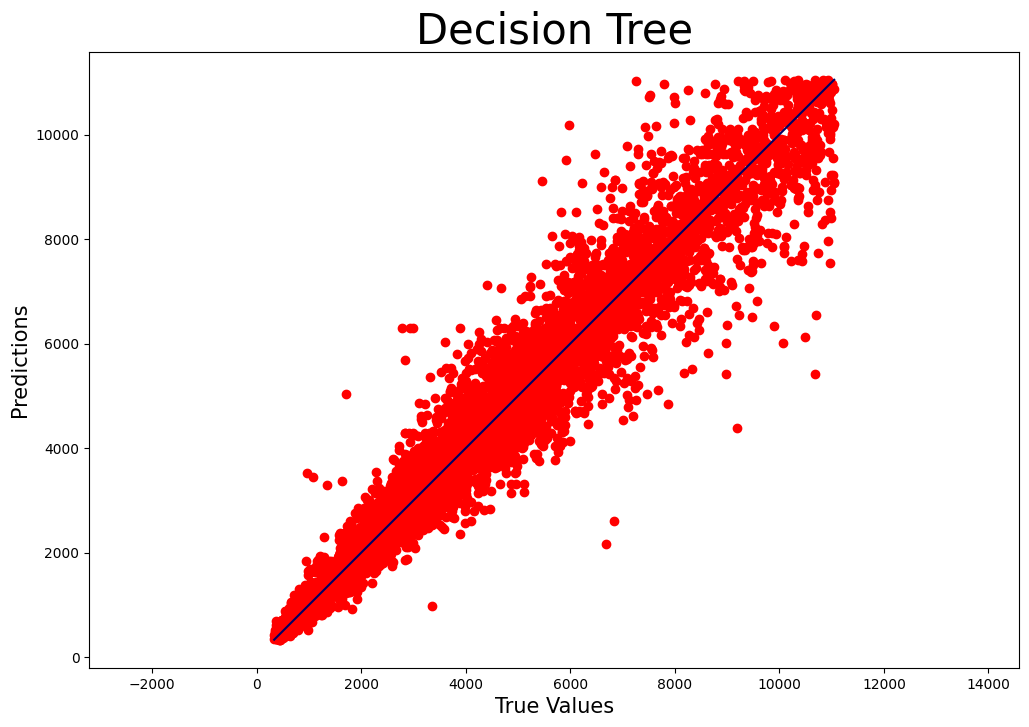

In [82]:
evaluate_model(x_test=normalized_x_test,y_test=y_test,model=DR,name='Decision Tree',color='red')

In [83]:
model=RandomForestRegressor(n_estimators=100, verbose=4)
model.fit(normalized_x_train, y_train)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100


[Parallel(n_jobs=1)]: Done  24 tasks      | elapsed:    2.8s


building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66

[Parallel(n_jobs=1)]: Done  97 tasks      | elapsed:   11.1s


building tree 99 of 100
building tree 100 of 100


RandomForestRegressor(verbose=4)

[Parallel(n_jobs=1)]: Done  24 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  97 tasks      | elapsed:    0.3s


Mean Absolute Error is 192.995

Mean Squared Error is 123722.527

Mean Absolute Percentage Error is 0.062

R Squared Error is 0.981



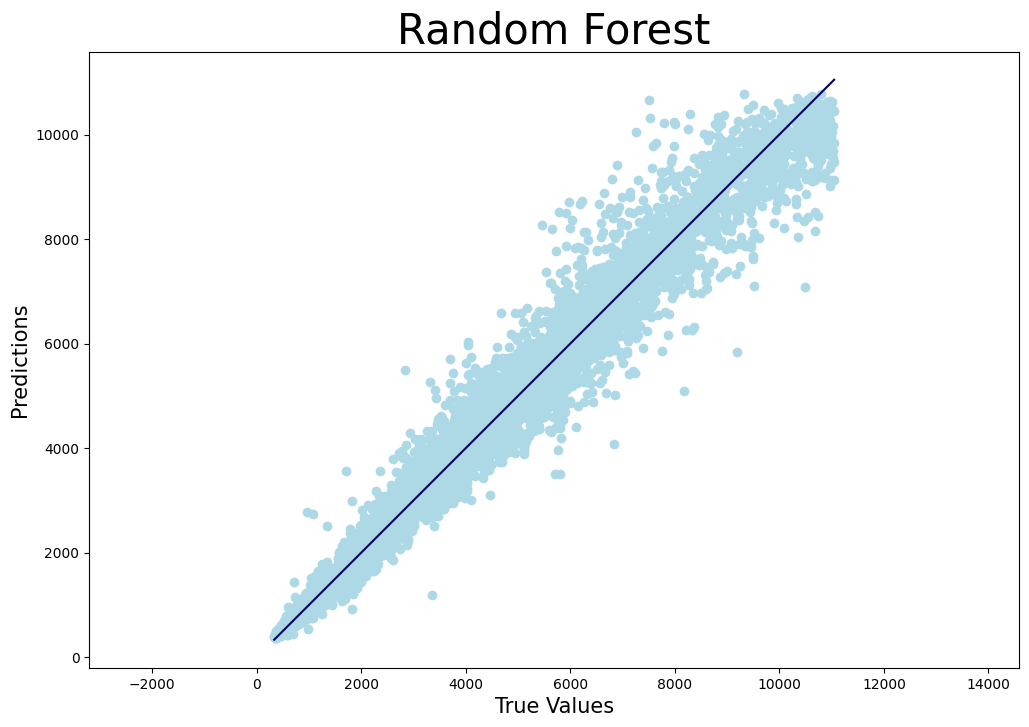

In [84]:
evaluate_model(x_test=normalized_x_test,y_test=y_test,model=model,name='Random Forest',color='lightblue')

<a id='section-7'></a>
<p style="background-color:#f2e9ee;color:#000;font-family:newtimeroman;font-size:200%;text-align:center;border-radius:10px 10px; padding:10px;">Comparing Models</p>

<p style="text-align:center;">
<a href="#section-0" style="background-color:#000;color:#fff;font-family:newtimeroman;text-align:center;border-radius:10px 10px; padding:10px;">Back To Top</a>
</p>

In [85]:
results = pd.DataFrame(d,index = ['MAE','MSE','MAPE','R2'])

In [86]:
results

,Linear Regression,Decision Tree,Random Forest
MAE,572.478408,258.500572,192.995007
MSE,737566.699874,224342.655365,123722.527290
MAPE,0.282204,0.082667,0.061987
R2,0.889613,0.966424,0.981483


In [87]:
results.loc['R2'].max()

np.float64(0.9814831753650933)

In [88]:
print('Michael Dandrea - mdandrea@coastal.edu')

Michael Dandrea - mdandrea@coastal.edu


<p style="color:#000066; font-size:20px;">Random Forest turned out to be the best model with 98% test R2-Score</p>

<a id='section-99'></a>
<p style="background-color:#f2e9ee;color:#000;font-family:newtimeroman;font-size:250%;text-align:center;border-radius:10px 10px; padding:10px;">Thank You</p>
<p style="background-color:#e6d8c8;color:#000;font-family:newtimeroman;font-size:180%;text-align:center;border-radius:10px 10px; padding:10px;">If you liked the notebook, do upvote it!!</p>

<div style="text-align:center">
    <img src="https://cdn.pixabay.com/photo/2016/11/25/07/00/diamond-1857733_960_720.png" width="420px">
    </div>

---